
# Cannabis legalization sentiment analysis

Twitter is one of the most important real-time communication networks functioning nowadays. Its popularity allows that hundreds of millions of tweets come into existence each day. People with access to this platform across the world can share their point of view or discuss with other users about any topic, from politics to entertainment, regardless of its geographical location or the closeness of their personal relationship. 
This detail and the rapid development of methodologies for dealing with the quantity and velocity of the data flowing in the stream, turns Twitter into an useful tool for approaching a sector of the public opinion. 

For this assignment, our aim is to retrieve some tweets, process and analyze them using the sentiment analysis technique in Python. This approach will allow us to understand the attitudes and perspectives of the users' manifest opinions. The topic of interest is cannabis and the legalization of its recreational use. We will try to find out how many times words related to cannabis and its legalization are used and in which direction of emotion –positive or negative– it goes.

## Introduction

Currently, the production, commerce and possession of psychoactive substances from three plants —namely coca leaf, opium poppy, and cannabis— are criminalized in the majority of the countries around the globe (Feilding, 2014). This prohibitionist approach has demonstrated been inefficient in terms of reducing its use. According to the United Nations Office on Drugs and Crime, the global cocaine production in 2016 reached out its highest level ever reviewed with an approximation of 1,410 tons being manufactured. Opium production followed the same upward trend. From 2016 to 2017 the production increased up to 65 percent since the start of the XXI century, standing at 10,500 tons. Finally, cannabis showed no exception, it was the most extensively used drug in 2016: 192 million people consumed at least once in that year and it seems that the increase of it will not diminish in the future (UNODC, 2018).

### The cannabis plant

The cannabis plant has been used for a variety of purposes over the past 3,000 years. Its range of applications goes from making textiles and cordage up to religious and recreational applications. This plant contains a variety of chemical compounds, being the following two the best known: 

- Cannabidiol (CBD), recognized for its medical applications and whose sale is legal for personal consumption in some countries, like Belgium itself; and, 
- Tetrahydrocannabinol (THC), best known for being the prohibited substance that can lift oneself into an altered state of consciousness. 

Historically, its utilization spread from Asia to Africa stretching out to Europe and the USA sole in the modern era (Feilding, 2014). Regardless of its relatively recent use in the western countries, it is the preferred psychoactive in terms of number of users. For this reason, its implications on criminal justice, economic issues and public health consecuenses are of prime importance. 


![Female cannabis plant portraying an early stage of flowering](female-cannabis.jpg "Cannabis Sativa Plant")

### Public opinion and cannabis use 

Public opinion regarding the recreational use of the cannabis plant tend to be more positive in countries like Uruguay, Canada and the Netherlands, where its recreational consume has been decriminalized (Mcginty _et al_., 2017). The perception there tends to be positive as the main idea is that cannabis is somewhat safer when compared with the effects of other drugs (Cohen _et al_., 2019). Generally, the debate is mostly centered for the pro-legalization in the economic and other policy advantages and, for those against it, in the public health risks (Mcginty _et al_., 2017).

One way to measure public opinion is through the use of _large-scale web-based data_ (Lamy _et al_., 2016). The harvesting of websites and applications that allows people to generate and share content is becoming more popular for the massive quantity of information available (Kok & Sanen 2017). Twitter is specially useful. The analysis of data retrieved from this micro-blogging site is getting more attention given the volume of information, constantly updated. There's an average of 500 million new tweets per day (Cooper, 2019) making it relatively easy and fast to spot trends regarding almost any topic.

The analysis of tweeters perceptions regarding psychoactives is no exception. For instance, one can find the works of  Hanson _et al_., 2013 exploring the use of Aderall and West _et al_., 2012, investigating the relation between users and alcohol. On cannabis, some examples include Daniulaityte _et al_., 2015 searching data on cannabis concentrate use in the U.S. and, Lamy _et al_., 2016, working on edibles-related tweets. Although the search for literature wasn't exhaustive, this indicate the potential for scrutinizing tweets on linked topics.  

The following section will describe the procedure for capturing tweets and its analysis.

# Data acquisition

For this excersice, we will use the _tweepy_ package (Roesslein, n. d.).  Tweepy is a python library, "open-sourced, hosted on GitHub" (Novalić, 2013),  which allows Python to interact with Twitter via its API (Application Programming Interface). An API  is a "set of protocols and routines for building and interacting with software applications"(Bowne-Anderson, n. d.). 
As we are looking for streaming twitter data using Python code, naturally we need to use the Twitter API.

## The Twitter API
The first step to obtain access to it is to log into Twitter Apps. Since we do not have a Twitter personal account we will have to create one. Honouring our red heeler, the user name is @RemsRemo.
After creating the app, we need to retrieve the authentication credentials so we can access the API from Python. We use the _GET statuses/sample_ API, which returns "a small random sample of all public statuses" (Twitter, n.d.).



The code is as follows:

In [1]:
import tweepy 
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import json
import textblob
from textblob import TextBlob
import pandas as pd
import re

In [2]:
# Create OAuth authentication credentials variables
consumer_key = "bRNChv4Wm76x79InBafziCuZz"
consumer_key_secret = "PU7ugFrkTtV3tiJYjuQHyx4DKqbfYMsAVT7DkkNehxBvKQDJ90"

access_token = "1129827043661754373-oivSuffxwOuPVgLKg0s4zKZhtthNPX"
access_token_secret = "SOJr58W0zV0FlkMBOD7IHu8ttswN64IUcb1eUcxaXRQfG"

In [3]:
# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Next, we define the stream listener class. From it, we will create the file "tweets_420.txt"<sup>1</sup> which is responsible of gathering the streamed tweets and turn them into a .txt file. We set our keywords and, once the number of tweets to capture have been streamed, we ask to close the file.

We create a class for streaming and processing live tweets.

Please, note that the number of tweets is set to 100 for the sake of simplicity. The more tweets requested, the longer it takes to gather the information.


In [41]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets_420.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        
        self.num_tweets += 1
        if self.num_tweets < 100: #manipulate the number of tweets here.
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)
        
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

In the next chunk of code we present the key words. It is important to notice that this list is not exhaustive since it does not include _street slang_ (like pot, maryjane, gage, ganja, etc...).

In [42]:
# Filter Twitter Streams to capture data by the keywords:

stream.filter(track = ['cannabis legalization', 'cannabis legalize', 
                       'cannabis recreational', 'cannabis illicit',
                      'marijuana legalization', 'marijuana legalize', 
                       'marijuana recreational', 'marijuana illicit',
                      'marihuana legalization', 'marihuana legalize', 
                       'marihuana recreational', 'marihuana illicit'])

Once the given number of tweets is reached, we can explore our data. Now we will do it with a larger sample, retrieved some days ago.

In [24]:
#Load and explore your Twitter data

# String of path to file: tweets_data_path
tweets_data_path = "/Users/erika.arguelles/tweets_5.txt" #here, change the name of the file to analize.

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()



In [25]:
# Print the keys of the first tweet dict
print(tweets_data[0].keys())

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [26]:
print(df.head())

                                                text lang
0  New Mexico House Passes Recreational Marijuana...   en
1  RT @robersondylannn: Legalize 5% tint not weed...   en
2  RT @robersondylannn: Legalize 5% tint not weed...   en
3  Twice as many British adults now support the l...   en
4  RT @robersondylannn: Legalize 5% tint not weed...   en


In [27]:
print(df.shape)

(2111, 2)


In [28]:
print(df.groupby('text').describe())

                                                    lang                 
                                                   count unique  top freq
text                                                                     
"Binkse May Become America’s Most Recognized Na...     1      1   en    1
"Legalisation will take back power from crimina...     1      1   en    1
"Legalization" of marijuana means what? That yo...     1      1   en    1
"Marijuana” praises the wonderful euphoria of c...     1      1   en    1
"The only thing that has reduced drug trafficki...     1      1   en    1
"The tide is turning"                                  1      1   en    1
"We might decide to drink a glass of wine from ...     1      1   en    1
"With Thailand’s legalization of medical cannab...     1      1   en    1
"“The attitude is that it’s already a part of t...     1      1   en    1
#420 ... #maconha ... #marijuana ... #cannabis ...     1      1  und    1
#Cannabis It was a time when voters ha

# Sentiment Analysis

As stated before, we are interested in doing a sentiment analyisis. In a nutshell, it consist in computing "the proportion of the words [that] have positive connotations, negative connotations or are neutral. This method is commonly referred to as sentiment analysis. The typical approach to sentiment analysis is to see how many words in a text are also in a predefined list of words associated with a sentiment" (Caren, 2019a). 

More generally, these methods can be used whenever you have a list of words, and you want to count their occurrences in a set of texts. They are commonly referred to as "dictionary methods." For this assignment, we will rely in the afinn lexicon.

## AFINN

[AFINN](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010) is an English word listed developed by Finn Årup Nielsen. Words scores range from minus five (negative) to plus five (positive). The English language dictionary consists of 2,477 coded words.

As Anaconda doesn't include this wordlist-based approach for sentiment analysis, the first step for us is to install it using the terminal with the following code:

```
%pip install afinn
```



In [29]:
from afinn import Afinn
afinn = Afinn()

We test afinn by calling `score`:

In [30]:
afinn.score('This is an utterly excellent and nice test!')

6.0

In [31]:
afinn.score('This test is ultra boring and very unnecessary.')

-3.0

In [32]:
afinn.score('But somehow fun. I can do it all day!')

4.0

It works. So the next step is to `apply` it to the tweets text.

In [33]:
df['afinn_score'] = df['text'].apply(afinn.score)

In [34]:
df['afinn_score'].describe()

count    2111.000000
mean       -1.347229
std         3.726966
min       -10.000000
25%        -2.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: afinn_score, dtype: float64

We need to keep in mind that the longer the tweet, the higher the posibility of yielding inflated values since they have more words. Following the suggestion of Caren, 2019b, we'll adjust by dividing the score by the number of words in the text.

In [35]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [36]:
df['word_count'] = df['text'].apply(word_count)

In [37]:
df['word_count'].describe()

count    2111.000000
mean       15.225959
std         5.773334
min         1.000000
25%        11.000000
50%        17.000000
75%        19.000000
max        27.000000
Name: word_count, dtype: float64

In [38]:
df['afinn_adjusted'] = df['afinn_score'] / df['word_count'] * 100

In [39]:
df['afinn_adjusted'].describe()

count    2111.000000
mean       -6.937656
std        21.733062
min      -200.000000
25%       -10.526316
50%         0.000000
75%         0.000000
max       200.000000
Name: afinn_adjusted, dtype: float64

We will plot the adjusted scores to see which values are most common.

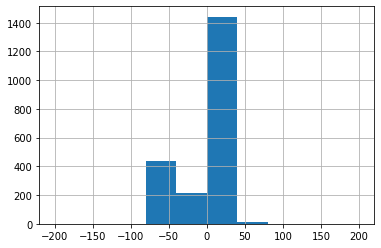

In [43]:
%matplotlib inline

df['afinn_adjusted'].hist(bins=10)

Now, we see that the majority of the tweets have a positive score but the negative values are much higher. It seems that if you disagree, then you will state it very clearly.

# Conclusion

It is important to mention the limitations of our project. The first thing to take into consideration is that Twitter is not a comprehensive registry of all the topics of public discussion and its users do not represent the whole population. On the practical side, it was not possible to collect all the activity on the network nor from the users that behave passively –just browsing and watching. 
Since we used the standard APIs, it was not possible to collect information from the past and, additionally, we have access to only 1% of the data without knowing how the sample was selected. 
Furthermore, we did not tried to geolocate or give a special treatment to the retweets or emojis and, as mentioned before, we did not selected the complete universe of words that could refer to cannabis.

Sentiment analyisis has lots of potential and using Python can make it relatively easy as you can automate the process -once you get how to do it-. 

#### Notes
<sup>1</sup> We made many attemps at different days, each time giving the .txt a new number. The 420 was random (not!). Please, find attached a folder with all the .txt collected, some with a few tweets, others with some more. We wanted to create a super .txt file with all the tweets blended together and then run the sentiment analysis but our python knowledge wasn't enough to achieve a proper super file, everything got mixed. 

# References

- Berke, J. (2019). Illinois just became the first state to legalize marijuana sales through the legislature - here are all the states where marijuana is legal. Retrieved from https://www.businessinsider.com/legal-marijuana-states-2018-1?r=US&IR=T.
- Bowne-Anderson, H. (n. d.) [Importing Data in Python (Part 2)]. (2019, June 05). Introduction to APIs and JSONs. Retrieved from https://campus.datacamp.com/courses/importing-data-in-python-part-2/interacting-with-apis-to-import-data-from-the-web-2?ex=1
- Caren, N. (2019a). (B-KUL-G0W36A) Capita Selecta in Statistics, session 04: Word Lists [jupyter notebook]. Retrieved from https://p.cygnus.cc.kuleuven.be/webapps/blackboard/content/listContent.jsp?course_id=_816418_1&content_id=_22142836_1&mode=reset.
- Caren, N. (2019b). Word Lists and Sentiment Analysis. Retrieved from https://nealcaren.org/lessons/wordlists/.
- Cohen, K., Weizman, A., & Weinstein, A. (2019). Positive and Negative Effects of Cannabis and Cannabinoids on Health. Clinical Pharmacology & Therapeutics, 105(5), 1139-1147. doi:10.1002/cpt.1381.
- Cooper, P. (2019, March 15). 28 Twitter Statistics All Marketers Should Know in 2019. Retrieved from https://blog.hootsuite.com/twitter-statistics/ 
- Daniulaityte, R., Nahhas, R.W., Wijeratne, S., Carlson, R.G., Lamy, F.R., Martins, S.S., Boyer, E.W., Smith, G.A., Sheth, A., 2015. Time for dabs: analyzing Twitter data on marijuana concentrates across the US. Drug Alcohol Depend. 155, 307–311.
- Feilding, A. (2014). Cannabis and the Psychedelics: Reviewing the UN Drug Conventions. En B. Caiuby Labate, & C. Cavnar , Prohibition, Religious Freedom, and Human Rights: Regulating Traditional Drug Use (págs. 189-210). Berlin: Springer.
- Finn Årup Nielsen, “A new ANEW: evaluation of a word list for sentiment analysis in microblogs”, Proceedings of the ESWC2011 Workshop on ‘Making Sense of Microposts’: Big things come in small packages. Volume 718 in CEUR Workshop Proceedings: 93-98. 2011 May. Matthew Rowe, Milan Stankovic, Aba-Sah Dadzie, Mariann Hardey (editors).
- Hanson, C.L., Burton, S.H., Giraud-Carrier, C., West, J.H., Barnes, M.D., Hansen, B., 2013. Tweaking and tweeting: exploring Twitter for nonmedical use of a psychostimulant drug (Adderall) among college students. J. Med. Internet Res. 15, e62.
- Kok, Marlies & Sanen, Fien (2017). Does Happiness on Social Media Reflect Actual Happiness or the Social Pressure to Be Happy? A Sentiment Analysis. #Twitter. Leuven: KU Leuven. Faculteit Psychologie En Pedagogische Wetenschappen.
- Lamy, F. R., Daniulaityte, R., Sheth, A., Nahhas, R. W., Martins, S. S., Boyer, E. W., & Carlson, R. G. (2016). “Those edibles hit hard”: Exploration of Twitter data on cannabis edibles in the U.S. Drug and Alcohol Dependence, 164, 64-70. doi:10.1016/j.drugalcdep.2016.04.029.
- Mcginty, E. E., Niederdeppe, J., Heley, K., & Barry, C. L. (2017). Public perceptions of arguments supporting and opposing recreational marijuana legalization. Preventive Medicine, 99, 80-86. doi:10.1016/j.ypmed.2017.01.024. 
- Novalić, A. (2013). Introduction to tweepy, Twitter for Python. Retrieved May 29, 2019, from https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/.
- Porcu, Valentina (2018). Python for Data Mining Quick Syntax Reference. Berkeley: Apress L. P. Web.
- Roesslein, J. (n. d.). Tweepy. Retrieved May 25, 2019, from https://github.com/tweepy/tweepy.
- Twitter (n.d.). GET statuses/sample - Twitter Developers. Retrieved May 25, 2019, from https://developer.twitter.com/en/docs/tweets/sample-realtime/overview/GET_statuse_sample.html.
- UNODC. (26 de June de 2018). About UNODC. Obtenido de World Drug Report 2018: opioid crisis, prescription drug abuse expands; cocaine and opium hit record highs: https://www.unodc.org/unodc/en/frontpage/2018/June/world-drug-report-2018_-opioid-crisis--prescription-drug-abuse-expands-cocaine-and-opium-hit-record-highs.html.
- West, J.H., Hall, P.C., Hanson, C.L., Prier, K., Giraud-Carrier, C., Neeley, E.S., Barnes, M.D., 2012. Temporal variability of problem drinking on Twitter. Open J. Prev. Med. 2.